# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #18 Recursion, the Fibonacci Sequence and Memoization

In [1]:
%run video-00.py

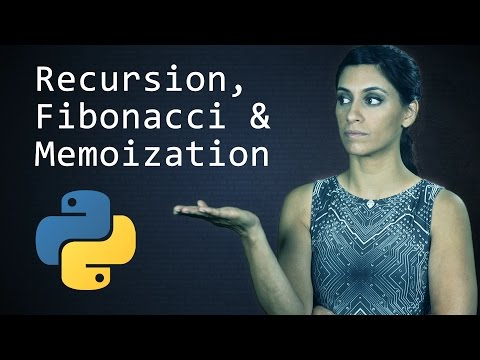

In [2]:
from IPython import display

video = display.YouTubeVideo('Qk0zUZW-U_M')
video
display.HTML(f'<a href="{video.src}">link</a>')

The [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number) is this:

$$0,1,1,2,3,5,8,13,21,34,55,89,…F_n$$

where

$$F_n = F_{n-1} + F_{n-2}$$

for $n>2$

and

$$F_0 = 0$$
$$F_1 = F_2 = 1$$

We can generate this sequence naïvely in Python:

In [3]:
def fibonacci_naive(n, showmessage=True):
    if showmessage:
        print('calling fibonacci_naive(', n, ')')

    if n == 1:
        return 1
    elif n == 2:
        return 1
    elif n > 2:
        return fibonacci_naive(n-1, showmessage) + fibonacci_naive(n-2, showmessage)

In [4]:
%%time

for n in range(1, 11): # the 11th item is not returned: [1,11)
    print('output:', n, ':', fibonacci_naive(n))

calling fibonacci_naive( 1 )
output: 1 : 1
calling fibonacci_naive( 2 )
output: 2 : 1
calling fibonacci_naive( 3 )
calling fibonacci_naive( 2 )
calling fibonacci_naive( 1 )
output: 3 : 2
calling fibonacci_naive( 4 )
calling fibonacci_naive( 3 )
calling fibonacci_naive( 2 )
calling fibonacci_naive( 1 )
calling fibonacci_naive( 2 )
output: 4 : 3
calling fibonacci_naive( 5 )
calling fibonacci_naive( 4 )
calling fibonacci_naive( 3 )
calling fibonacci_naive( 2 )
calling fibonacci_naive( 1 )
calling fibonacci_naive( 2 )
calling fibonacci_naive( 3 )
calling fibonacci_naive( 2 )
calling fibonacci_naive( 1 )
output: 5 : 5
calling fibonacci_naive( 6 )
calling fibonacci_naive( 5 )
calling fibonacci_naive( 4 )
calling fibonacci_naive( 3 )
calling fibonacci_naive( 2 )
calling fibonacci_naive( 1 )
calling fibonacci_naive( 2 )
calling fibonacci_naive( 3 )
calling fibonacci_naive( 2 )
calling fibonacci_naive( 1 )
calling fibonacci_naive( 4 )
calling fibonacci_naive( 3 )
calling fibonacci_naive( 2 )
ca

This first attempt is naïve because we can clearly see this function being called with the same arguments repeatedly. The [time complexity](https://en.wikipedia.org/wiki/Time_complexity) of this function is debilitating as `range` increases:

In [5]:
%%time

for n in range(1, 21):
    print('output:', n, ':', fibonacci_naive(n, showmessage=False))

output: 1 : 1
output: 2 : 1
output: 3 : 2
output: 4 : 3
output: 5 : 5
output: 6 : 8
output: 7 : 13
output: 8 : 21
output: 9 : 34
output: 10 : 55
output: 11 : 89
output: 12 : 144
output: 13 : 233
output: 14 : 377
output: 15 : 610
output: 16 : 987
output: 17 : 1597
output: 18 : 2584
output: 19 : 4181
output: 20 : 6765
Wall time: 20.5 ms


In [6]:
%%time

for n in range(1, 31):
    print('output:', n, ':', fibonacci_naive(n, showmessage=False))

output: 1 : 1
output: 2 : 1
output: 3 : 2
output: 4 : 3
output: 5 : 5
output: 6 : 8
output: 7 : 13
output: 8 : 21
output: 9 : 34
output: 10 : 55
output: 11 : 89
output: 12 : 144
output: 13 : 233
output: 14 : 377
output: 15 : 610
output: 16 : 987
output: 17 : 1597
output: 18 : 2584
output: 19 : 4181
output: 20 : 6765
output: 21 : 10946
output: 22 : 17711
output: 23 : 28657
output: 24 : 46368
output: 25 : 75025
output: 26 : 121393
output: 27 : 196418
output: 28 : 317811
output: 29 : 514229
output: 30 : 832040
Wall time: 590 ms


### Memoization

[_Memoization_](https://en.wikipedia.org/wiki/Memoization) is term coined by Donald Michie in 1968 from the Latin word _memorandum_. By caching previously calculated values our Fibonacci function can _remember_ its previoius work and save time by simply returning that work.

Python supports memoization natively. But before we see that, let us implement it explicitly:


In [7]:
fibonacci_cache = {}

def fibonacci_explicit(n):
    if n in fibonacci_cache:
        return fibonacci_cache[n]

    if n == 1:
        return 1
    elif n == 2:
        return 1
    elif n > 2:
        value = fibonacci_explicit(n-1) + fibonacci_explicit(n-2)
        fibonacci_cache[n] = value
        return value

In [8]:
%%time

for n in range(1, 51):
    print('output:', n, ':', fibonacci_explicit(n))

output: 1 : 1
output: 2 : 1
output: 3 : 2
output: 4 : 3
output: 5 : 5
output: 6 : 8
output: 7 : 13
output: 8 : 21
output: 9 : 34
output: 10 : 55
output: 11 : 89
output: 12 : 144
output: 13 : 233
output: 14 : 377
output: 15 : 610
output: 16 : 987
output: 17 : 1597
output: 18 : 2584
output: 19 : 4181
output: 20 : 6765
output: 21 : 10946
output: 22 : 17711
output: 23 : 28657
output: 24 : 46368
output: 25 : 75025
output: 26 : 121393
output: 27 : 196418
output: 28 : 317811
output: 29 : 514229
output: 30 : 832040
output: 31 : 1346269
output: 32 : 2178309
output: 33 : 3524578
output: 34 : 5702887
output: 35 : 9227465
output: 36 : 14930352
output: 37 : 24157817
output: 38 : 39088169
output: 39 : 63245986
output: 40 : 102334155
output: 41 : 165580141
output: 42 : 267914296
output: 43 : 433494437
output: 44 : 701408733
output: 45 : 1134903170
output: 46 : 1836311903
output: 47 : 2971215073
output: 48 : 4807526976
output: 49 : 7778742049
output: 50 : 12586269025
Wall time: 1.95 ms


In [9]:
%%time

for n in range(1, 101):
    print('output:', n, ':', fibonacci_explicit(n))

output: 1 : 1
output: 2 : 1
output: 3 : 2
output: 4 : 3
output: 5 : 5
output: 6 : 8
output: 7 : 13
output: 8 : 21
output: 9 : 34
output: 10 : 55
output: 11 : 89
output: 12 : 144
output: 13 : 233
output: 14 : 377
output: 15 : 610
output: 16 : 987
output: 17 : 1597
output: 18 : 2584
output: 19 : 4181
output: 20 : 6765
output: 21 : 10946
output: 22 : 17711
output: 23 : 28657
output: 24 : 46368
output: 25 : 75025
output: 26 : 121393
output: 27 : 196418
output: 28 : 317811
output: 29 : 514229
output: 30 : 832040
output: 31 : 1346269
output: 32 : 2178309
output: 33 : 3524578
output: 34 : 5702887
output: 35 : 9227465
output: 36 : 14930352
output: 37 : 24157817
output: 38 : 39088169
output: 39 : 63245986
output: 40 : 102334155
output: 41 : 165580141
output: 42 : 267914296
output: 43 : 433494437
output: 44 : 701408733
output: 45 : 1134903170
output: 46 : 1836311903
output: 47 : 2971215073
output: 48 : 4807526976
output: 49 : 7778742049
output: 50 : 12586269025
output: 51 : 20365011074
output: 5

### Python’s Least Recently Used (LRU) Cache

Using Python’s `lru_cache` [📖 [docs](https://docs.python.org/3.4/library/functools.html?#functools.lru_cache)], we can return to the clarity of our naïve function with a little decoration:

In [10]:
from functools import lru_cache

@lru_cache(maxsize=1000)
def fibonacci(n):
    if n == 1:
        return 1
    elif n == 2:
        return 1
    elif n > 2:
        return fibonacci(n-1) + fibonacci(n-2)

In [11]:
%%time

for n in range(1, 51):
    print('output:', n, ':', fibonacci(n))

output: 1 : 1
output: 2 : 1
output: 3 : 2
output: 4 : 3
output: 5 : 5
output: 6 : 8
output: 7 : 13
output: 8 : 21
output: 9 : 34
output: 10 : 55
output: 11 : 89
output: 12 : 144
output: 13 : 233
output: 14 : 377
output: 15 : 610
output: 16 : 987
output: 17 : 1597
output: 18 : 2584
output: 19 : 4181
output: 20 : 6765
output: 21 : 10946
output: 22 : 17711
output: 23 : 28657
output: 24 : 46368
output: 25 : 75025
output: 26 : 121393
output: 27 : 196418
output: 28 : 317811
output: 29 : 514229
output: 30 : 832040
output: 31 : 1346269
output: 32 : 2178309
output: 33 : 3524578
output: 34 : 5702887
output: 35 : 9227465
output: 36 : 14930352
output: 37 : 24157817
output: 38 : 39088169
output: 39 : 63245986
output: 40 : 102334155
output: 41 : 165580141
output: 42 : 267914296
output: 43 : 433494437
output: 44 : 701408733
output: 45 : 1134903170
output: 46 : 1836311903
output: 47 : 2971215073
output: 48 : 4807526976
output: 49 : 7778742049
output: 50 : 12586269025
Wall time: 2.93 ms


In [12]:
%%time

for n in range(1, 101):
    print('output:', n, ':', fibonacci(n))

output: 1 : 1
output: 2 : 1
output: 3 : 2
output: 4 : 3
output: 5 : 5
output: 6 : 8
output: 7 : 13
output: 8 : 21
output: 9 : 34
output: 10 : 55
output: 11 : 89
output: 12 : 144
output: 13 : 233
output: 14 : 377
output: 15 : 610
output: 16 : 987
output: 17 : 1597
output: 18 : 2584
output: 19 : 4181
output: 20 : 6765
output: 21 : 10946
output: 22 : 17711
output: 23 : 28657
output: 24 : 46368
output: 25 : 75025
output: 26 : 121393
output: 27 : 196418
output: 28 : 317811
output: 29 : 514229
output: 30 : 832040
output: 31 : 1346269
output: 32 : 2178309
output: 33 : 3524578
output: 34 : 5702887
output: 35 : 9227465
output: 36 : 14930352
output: 37 : 24157817
output: 38 : 39088169
output: 39 : 63245986
output: 40 : 102334155
output: 41 : 165580141
output: 42 : 267914296
output: 43 : 433494437
output: 44 : 701408733
output: 45 : 1134903170
output: 46 : 1836311903
output: 47 : 2971215073
output: 48 : 4807526976
output: 49 : 7778742049
output: 50 : 12586269025
output: 51 : 20365011074
output: 5

In [13]:
%%time

for n in range(1, 251):
    print('output:', n, ':', fibonacci(n))

output: 1 : 1
output: 2 : 1
output: 3 : 2
output: 4 : 3
output: 5 : 5
output: 6 : 8
output: 7 : 13
output: 8 : 21
output: 9 : 34
output: 10 : 55
output: 11 : 89
output: 12 : 144
output: 13 : 233
output: 14 : 377
output: 15 : 610
output: 16 : 987
output: 17 : 1597
output: 18 : 2584
output: 19 : 4181
output: 20 : 6765
output: 21 : 10946
output: 22 : 17711
output: 23 : 28657
output: 24 : 46368
output: 25 : 75025
output: 26 : 121393
output: 27 : 196418
output: 28 : 317811
output: 29 : 514229
output: 30 : 832040
output: 31 : 1346269
output: 32 : 2178309
output: 33 : 3524578
output: 34 : 5702887
output: 35 : 9227465
output: 36 : 14930352
output: 37 : 24157817
output: 38 : 39088169
output: 39 : 63245986
output: 40 : 102334155
output: 41 : 165580141
output: 42 : 267914296
output: 43 : 433494437
output: 44 : 701408733
output: 45 : 1134903170
output: 46 : 1836311903
output: 47 : 2971215073
output: 48 : 4807526976
output: 49 : 7778742049
output: 50 : 12586269025
output: 51 : 20365011074
output: 5

As a finishing touch, we can add logic gates to protect against input not intended for this function:

In [14]:
@lru_cache(maxsize=1000)
def fibonacci_finished(n):
    if type(n) != int:
        raise TypeError('an `int` is expected')

    if n < 1:
        raise TypeError('an `int` greater than `1` is expected')

    if n == 1:
        return 1
    elif n == 2:
        return 1
    elif n > 2:
        return fibonacci(n-1) + fibonacci(n-2)

In [15]:
fibonacci_finished("sixty")

TypeError: an `int` is expected

In [16]:
fibonacci_finished(-42)

TypeError: an `int` greater than `1` is expected

In [17]:
fibonacci_finished(42)

267914296